<a href="https://colab.research.google.com/github/mydevco/python-desktop-reference/blob/main/UnsupervisedLearning_SKlearn_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week7 Assignment K-Means Clustering
Use the Iris data set  for multi-class classification using unsupervised learning.

Perform clustering on the dataset to segment data items into different groups. Use techniques like k-Means clustering and visualize the clusters.

Import the dataset into colab notebook

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

#Fetch dataset as panda dataframe
iris = pd.read_csv('https://archive.ics.uci.edu/static/public/53/data.csv')
iris.info()


print(iris.sample(5))


#Total rows
print(f'Total number of rows {len(iris)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
     sepal length  sepal width  petal length  petal width            class
20            5.4          3.4           1.7          0.2      Iris-setosa
86            6.7          3.1           4.7          1.5  Iris-versicolor
138           6.0          3.0           4.8          1.8   Iris-virginica
75            6.6          3.0           4.4          1.4  Iris-versicolor
127           6.1          3.0           4.9          1.8   Iris-virginica
Total number of rows 150


#Import libraries

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

In [ ]:
iris.head() #Print top rows

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris["class"].value_counts() #print count per class

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


##Preprocess data

In [ ]:
#Preprocess replace space with underscore in column names
iris.columns = iris.columns.str.replace(' ', '_')

#Remove the categories or class columns for unsupersed K-Means clustering analysis
# split data into features (X) and labels (y)
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]

Remove duplicate rows

In [ ]:
iris = iris.dropna() #no effect as thewre are no dupliocate values
#Total rows
print(f'Total number of rows {len(iris)}')

Total number of rows 150


In [ ]:
# Check for null data
mv = iris.isnull()
#There is no null values
print(mv)

     sepal_length  sepal_width  petal_length  petal_width  class
0           False        False         False        False  False
1           False        False         False        False  False
2           False        False         False        False  False
3           False        False         False        False  False
4           False        False         False        False  False
..            ...          ...           ...          ...    ...
145         False        False         False        False  False
146         False        False         False        False  False
147         False        False         False        False  False
148         False        False         False        False  False
149         False        False         False        False  False

[150 rows x 5 columns]


#Visualize Data

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

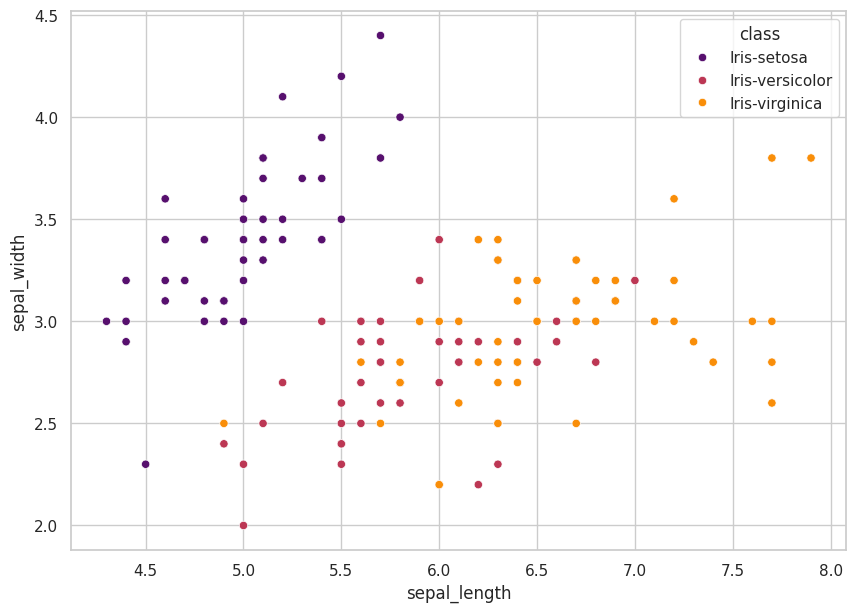

In [ ]:
#Draw scatterplot for sepal length and width
fig = plt.figure(figsize = (10, 7))
sns.set(style='whitegrid')
sns.scatterplot(x="sepal_length",
                    y="sepal_width",hue='class',
                    data=iris, palette="inferno")

<Axes: xlabel='petal_length', ylabel='petal_width'>

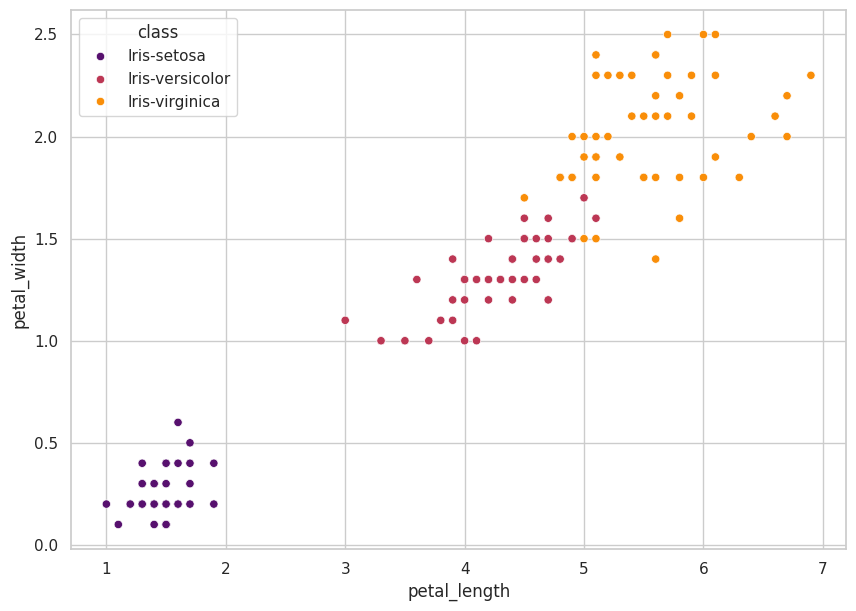

In [ ]:
#Draw scatterplot for petal length and width
fig = plt.figure(figsize = (10, 7))
sns.set(style='whitegrid')
sns.scatterplot(x="petal_length",
                    y="petal_width",hue='class',
                    data=iris, palette="inferno")

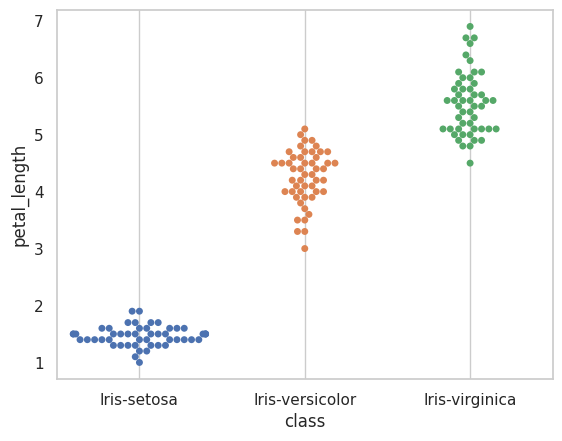

In [ ]:
# show petal length distributions in a swarm plot -
# just shows one dimension of the data, so not as useful as the previous plots
sns.swarmplot(x="class", y="petal_length", hue='class', data=iris)
plt.grid()

#Preprocess using scaler function

In [ ]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
65,1.038005,0.106445,0.364699,0.264699
64,-0.294842,-0.356361,-0.090227,0.133226
58,0.916837,-0.356361,0.478430,0.133226
126,0.432165,-0.587764,0.592162,0.790591
28,-0.779513,0.800654,-1.341272,-1.312977


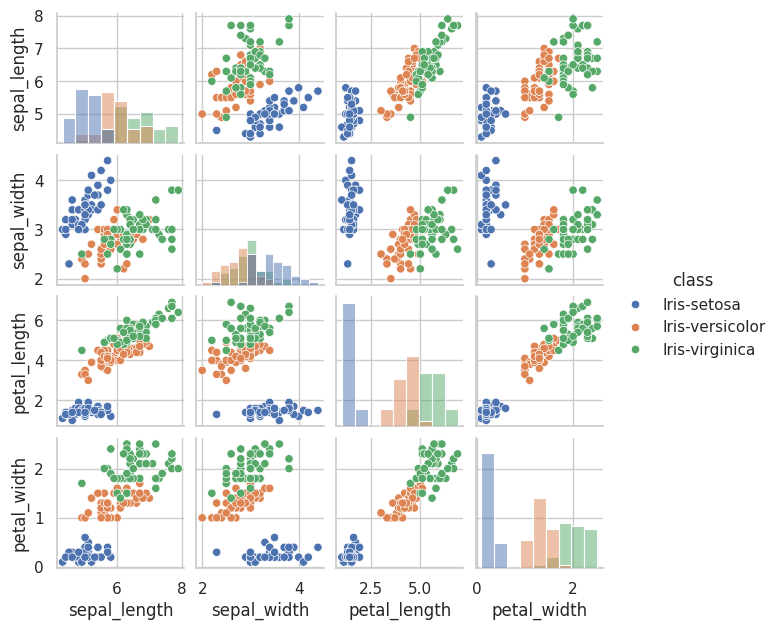

In [ ]:
# make a scatter matrix showing each pair of features in the data.
# seaborn can show the species labels as different colors, but
# normally with EDA you wouldn't have that information.
# note: the semicolon at the end just hides a line of text output.
sns.pairplot(iris, hue="class", diag_kind="hist", size=1.6);

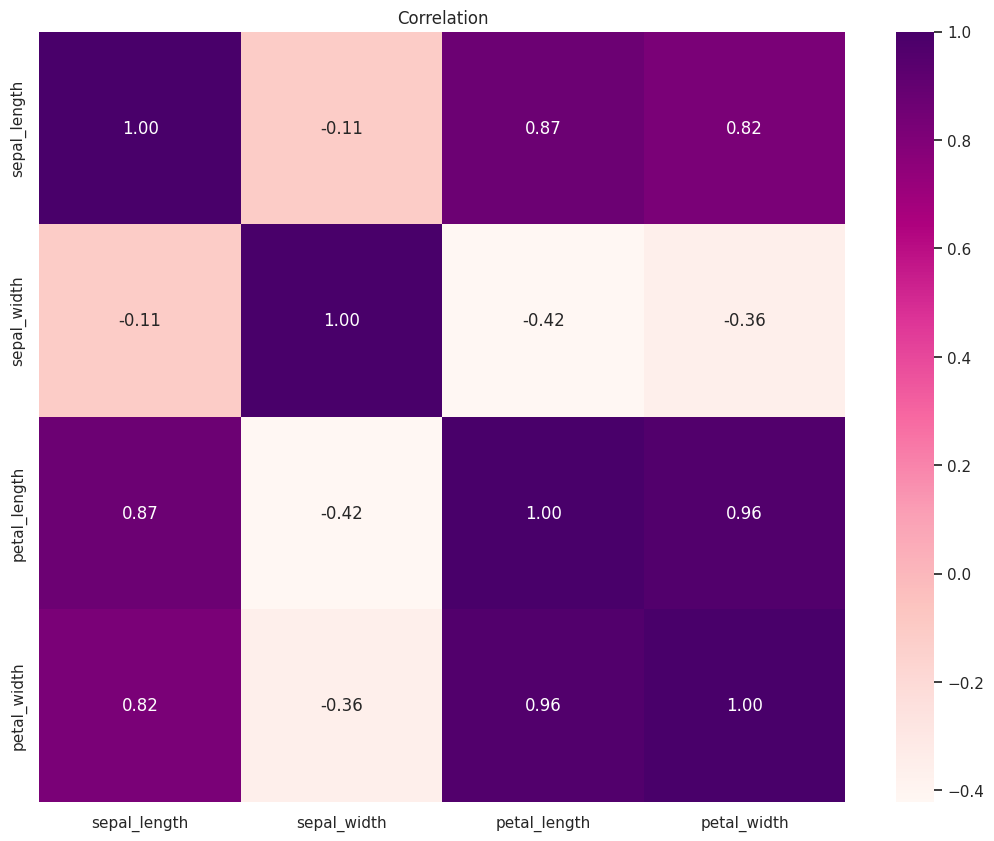

In [ ]:
#Plot heatmap
plt.figure(figsize=(13,10))
col=X_scaled.corr()
sns.heatmap(col,annot=True,fmt='.2f',cmap="RdPu");
plt.title("Correlation")
plt.show()

In [ ]:
# try clustering on the four dimentional data and see if can reproduce the actual clusters.

# Assuming we don't have the class labels on this data and wanted to
# divide the IRIS into distinct classes. We could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

# Using Silhouette score

Silhouette score - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(f"silhouette score is {score}")

silhouette score is 0.4556692449110409


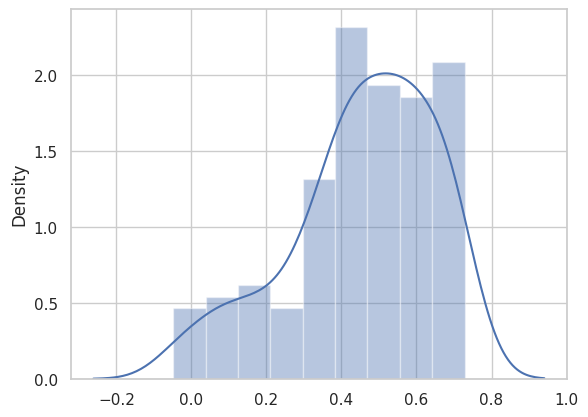

In [ ]:
# note that this is the mean over all the samples - there might be some clusters
# that are well separated and others that are closer together.

# so let's look at the distribution of silhouette scores...

scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

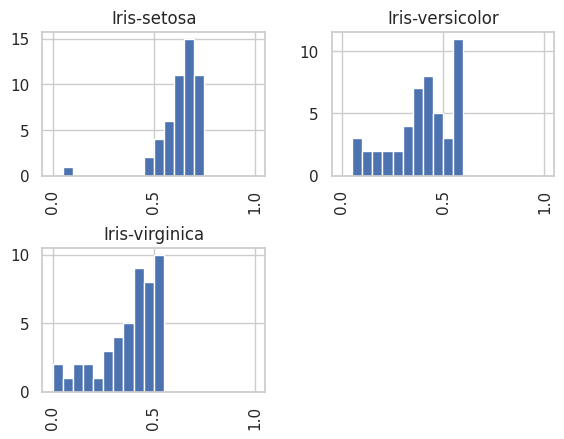

In [ ]:
#Plot the distribution per class
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['class'] = iris['class']
df_scores.hist(by='class', column='SilhouetteScore', range=(0,1.0), bins=20);

Based on the plot above versicolor and virginica have lower silhouette scores than setosas, because they are closer together.



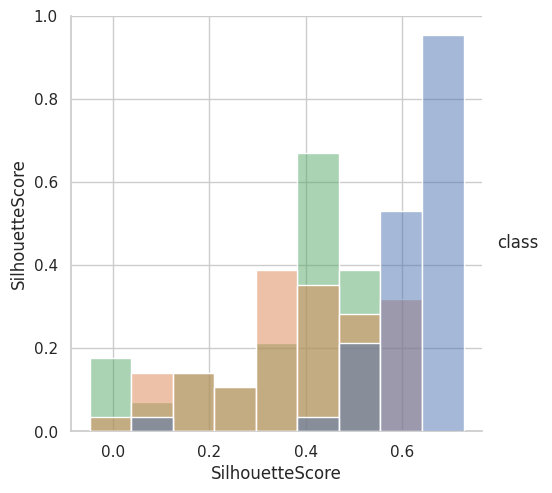

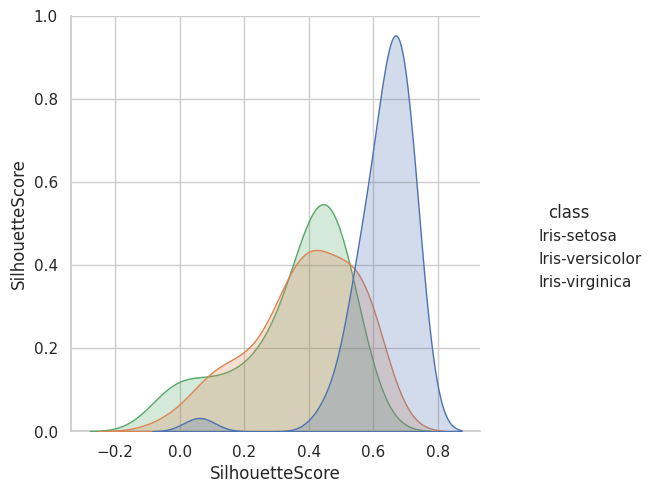

In [ ]:
# put them all on one histogram
sns.pairplot(df_scores, hue="class", size=5,kind='hist');
sns.pairplot(df_scores, hue="class", size=5,kind='reg');

# Using Elbow method

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

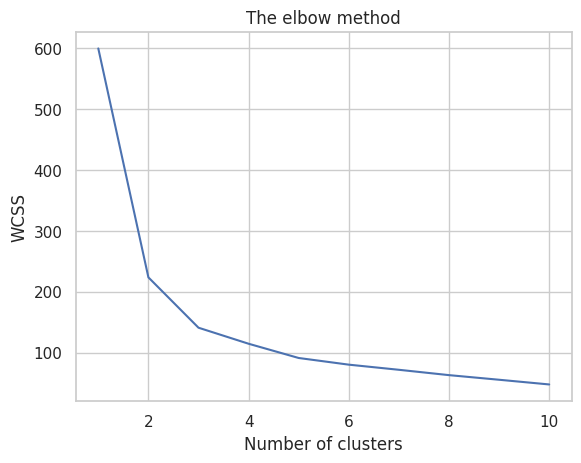

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


Inference: The optimum clusters is where the elbow occurs (K=3). This is the value where the cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [ ]:
# Using the optimum amount of clusters, applying K-means clustering to the Iris dataset with K=3.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_scaled)


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

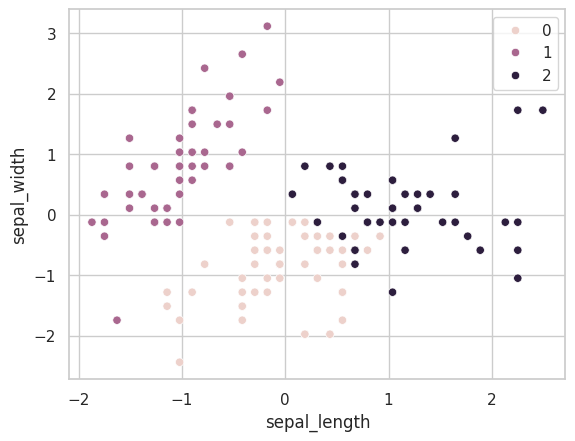

In [ ]:
# We can see three clusters
sns.scatterplot(data = X_scaled, x = 'sepal_length', y = 'sepal_width', hue = kmeans.labels_)


<Axes: xlabel='petal_length', ylabel='petal_width'>

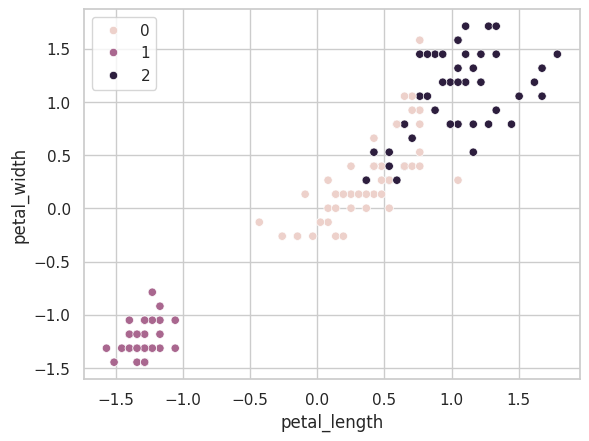

In [ ]:
# We can see three clusters
sns.scatterplot(data = X_scaled, x = 'petal_length', y = 'petal_width', hue = kmeans.labels_)